# <font color=gray>**Introduction to Statistics in Python**</font>

### <font color=orange>**Random Numbers and Probability**</font>

In [2]:
import pandas as pd
amir_deals=pd.read_csv('amir_deals.csv')

In [3]:
#step1
# Count the deals for each product
counts = amir_deals['product'].value_counts()
print(counts)

Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product G     2
Product J     2
Name: product, dtype: int64


In [4]:
# Count the deals for each product
counts = amir_deals['product'].value_counts()

# Calculate probability of picking a deal with each product
probs = counts/counts.sum()
print(probs)

Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: product, dtype: float64


**Question** : 
If you randomly select one of Amir's deals, what's the probability that the deal will involve Product C?


In [9]:
probC=counts['Product C']/counts.sum()*100
probC

8.426966292134832

In [11]:
import numpy as np

In [12]:
#Step1

# Set random seed
np.random.seed(24)

# Sample 5 deals without replacement
sample_without_replacement = amir_deals.sample(5)
print(sample_without_replacement)

     Unnamed: 0    product   client status   amount  num_users
127         128  Product B  Current    Won  2070.25          7
148         149  Product D  Current    Won  3485.48         52
77           78  Product B  Current    Won  6252.30         27
104         105  Product D  Current    Won  4110.98         39
166         167  Product C      New   Lost  3779.86         11


In [13]:
# Set random seed
np.random.seed(24)

# Sample 5 deals with replacement
sample_with_replacement = amir_deals.sample(5,replace=True)
print(sample_with_replacement)

     Unnamed: 0    product   client status   amount  num_users
162         163  Product D  Current    Won  6755.66         59
131         132  Product B  Current    Won  6872.29         25
87           88  Product C  Current    Won  3579.63          3
145         146  Product A  Current    Won  4682.94         63
145         146  Product A  Current    Won  4682.94         63


**Question** : What type of sampling is better to use for this situation?

Without replacement. 
(If you sample with replacement, you might end up calling the same customer twice.)

In [14]:
#Discrete distributions

In [18]:
import matplotlib.pyplot as plt

In [19]:
restaurant_groups=pd.DataFrame([['A', 2],
       ['B', 4],
       ['C', 6],
       ['D', 2],
       ['E', 2],
       ['F', 2],
       ['G', 3],
       ['H', 2],
       ['I', 4],
       ['J', 2]],columns=['group_id','group_size'])

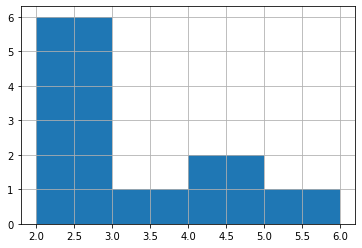

In [20]:
#Step1
# Create a histogram of restaurant_groups and show plot
restaurant_groups['group_size'].hist(bins=[2,3,4,5,6])
plt.show()

In [22]:
#Step2

# Create probability distribution
size_dist = restaurant_groups['group_size'].value_counts() / restaurant_groups['group_size'].value_counts().sum()

# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size','prob']

print(size_dist)

   group_size  prob
0           2   0.6
1           4   0.2
2           6   0.1
3           3   0.1


In [23]:
#Step3

# Create probability distribution
size_dist = restaurant_groups['group_size'].value_counts() / restaurant_groups.shape[0]
# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']

# Calculate expected value
expected_value = (size_dist['group_size']*size_dist['prob']).sum()
print(expected_value)

2.9000000000000004


In [24]:
#Step4

# Create probability distribution
size_dist = restaurant_groups['group_size'].value_counts() / restaurant_groups.shape[0]
# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']

# Expected value
expected_value = np.sum(size_dist['group_size'] * size_dist['prob'])

# Subset groups of size 4 or more
groups_4_or_more = size_dist[size_dist['group_size']>=4]

# Sum the probabilities of groups_4_or_more
prob_4_or_more = np.sum(groups_4_or_more['prob'])
print(prob_4_or_more)

0.30000000000000004


In [25]:
#Step1

# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

In [26]:
#Step2

# Import uniform from scipy.stats
from scipy.stats import uniform

# Calculate probability of waiting less than 5 mins
prob_less_than_5 = uniform.cdf(5,0,30)
print(prob_less_than_5)

0.16666666666666666


In [31]:
#Step3

# Calculate probability of waiting more than 5 mins
prob_greater_than_5 = 1-uniform.cdf(5,0,30)
print(prob_greater_than_5)

0.8333333333333334


In [30]:
#Step4

# Calculate probability of waiting 10-20 mins
prob_between_10_and_20 = uniform.cdf(20,0,30)-uniform.cdf(10,0,30)
print(prob_between_10_and_20)

0.3333333333333333


In [34]:
#Step1
# Set random seed to 334
np.random.seed(334)

In [35]:
#Step2
# Import uniform
from scipy.stats import uniform

In [36]:
#Step3
# Generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(0,30,size=1000)

print(wait_times)

[ 7.144097    0.97455866  3.72802787  5.11644319  8.70602482 24.69140099
 23.98012075  3.19592668 25.1985306  17.89048629 24.68695356 18.27160808
 22.85829011  0.12929581 15.67789664  2.3262095  15.79151771 21.90473557
 18.25817257 15.78657023 28.74328434  9.38971275 17.0010565   0.95433991
 15.96917606  2.16395679  8.903302   19.24982156  6.52414731 14.10185677
 27.86973455 14.38121016 28.59233824 13.17550521 22.96382405  2.52904371
  6.2163781   8.40217036  4.48079914 28.16365298 19.73302715  3.63959282
  1.74002295  1.5324219  26.97096908 29.37490861  4.71379092  6.44990488
  6.81999564 22.81302458 12.41563042 11.14591581  8.08043184 29.60574053
  3.24571518 19.66709277 13.38939302 29.56433707 24.84697258  6.249684
 15.07668579  5.27474477 27.27430815  2.42084219 27.88317515  0.81231424
  3.48564273 19.80738592  6.11128124 19.10323692  9.12156821 28.31696467
 20.80158047 17.0840986  26.59969632 28.38502685 20.75398728 11.73610958
 20.55950389 18.20349931  4.68857179 17.67638417 29.9

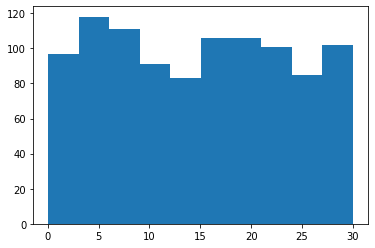

In [37]:
# Create a histogram of simulated times and show plot
plt.hist(wait_times)
plt.show()

In [38]:
#Binom

In [39]:
#Step1
# Import binom from scipy.stats
from scipy.stats import binom

# Set random seed to 10
np.random.seed(10)

In [40]:
#Step2
# Simulate a single deal
print(binom.rvs(1, .3, size=1))

[1]


In [41]:
#Step3
# Simulate 1 week of 3 deals
print(binom.rvs(3, .3, size=1))

[0]


In [42]:
#Step4
# Simulate 52 weeks of 3 deals
deals = binom.rvs(3,.3,size=52)

# Print mean deals won per week
print(deals.mean())

0.8461538461538461


In [43]:
#Step1
# Probability of closing 3 out of 3 deals
prob_3 = binom.pmf(3,3,0.3)

print(prob_3)

0.026999999999999996


In [44]:
#Step2
# Probability of closing <= 1 deal out of 3 deals
prob_less_than_or_equal_1 = binom.cdf(1,3,.3)

print(prob_less_than_or_equal_1)

0.784


In [45]:
#Step3
# Probability of closing > 1 deal out of 3 deals
prob_greater_than_1 = 1-binom.cdf(1,3,.3)

print(prob_greater_than_1)

0.21599999999999997


In [46]:
# Expected number won with 30% win rate
won_30pct = 3 * 0.3
print(won_30pct)

# Expected number won with 25% win rate
won_25pct = 3*0.25
print(won_25pct)

# Expected number won with 35% win rate
won_35pct = 3*0.35
print(won_35pct)

0.8999999999999999
0.75
1.0499999999999998
